# Simplifying Cancer Screening - Feature Selection Case Study

## Problem Statement

John Cancer Hospital (JCH) is a leading cancer hospital in USA. It specializes in treating breast cancer. Over the last few years, JCH has collected breast cancer data from patients who came for screening/treatment. However, this data has almost 30 attributes, and it is difficult to run and interpret the results. We have to reduce the number of attributes (Dimensionality Reduction) so that the results are meaningful and accurate.

## Objective

To reduce the number of attributes/features in data to make the analysis of the results comprehensible to doctors.

## Data: Cancer Data Set
Features are computed from a digitized image of a Fine-Needle Aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image. n the 3-dimensional space is that described in: [K. P. Bennett and O. L. Mangasarian: "Robust Linear Programming Discrimination of Two Linearly Inseparable Sets", Optimization Methods and Software 1, 1992, 23-34].

This database is also available through the UW CS ftp server: ftp ftp.cs.wisc.edu cd math-prog/cpo-dataset/machine-learn/WDBC/

Also can be found on UCI Machine Learning Repository: https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29

Attribute Information:

1) ID number 2) Diagnosis (M = malignant, B = benign)

10 real-valued features are computed for each cell nucleus:

a) radius (mean of distances from center to points on the perimeter) b) texture (standard deviation of gray-scale values) c) perimeter d) area e) smoothness (local variation in radius lengths) f) compactness (perimeter^2 / area - 1.0) g) concavity (severity of concave portions of the contour) h) concave points (number of concave portions of the contour) i) symmetry j) fractal dimension ("coastline approximation" - 1)

The mean, standard error and "worst" or largest (mean of the three largest values) of these features were computed for each image, resulting in 30 features. For instance, field 3 is Mean Radius, field 13 is Radius SE, field 23 is Worst Radius.

All feature values are recoded with four significant digits.

Missing attribute values: none

Class distribution: 357 benign, 212 malignant

## Libraries

In [14]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

## Data Preparation

In [15]:
df = pd.read_csv('breast-cancer-data.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [16]:
# Check the data , there should be no missing values 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [18]:
# Convert diagnosis column to 1/0 and store in new column target
## Encode label diagnosis
## M -> 1
## B -> 0

target_data=df["diagnosis"]

encoder = LabelEncoder()
target_data = encoder.fit_transform(target_data)

In [19]:
# drop the diagnosis column

df.drop(["diagnosis","id"],axis = 1, inplace = True)

In [56]:
df.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## Principal Component Analysis (PCA)

Use  PCA to find the first two principal components, and visualize the data in this new, two-dimensional space, with a single scatter-plot.

Principal Components Analysis (PCA) is a well-known unsupervised dimensionality reduction technique that constructs relevant features/variables combinations of the original variables (features).

### 1. With 2 Principal Components

In [20]:
# Standardize data (scale data so that each feature has a single unit variance)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df)
scaled_data = scaler.transform(df)

In [21]:
# transform data to its first 2 principal components

from sklearn.decomposition import PCA

pca = PCA(n_components=2)
x_pca = pca.fit_transform(scaled_data)

In [55]:
print('Original shape', scaled_data.shape)
print('\nTransformed shape', x_pca.shape)

Original shape (569, 30)

Transformed shape (569, 2)


Text(0, 0.5, 'Second Principal Component')

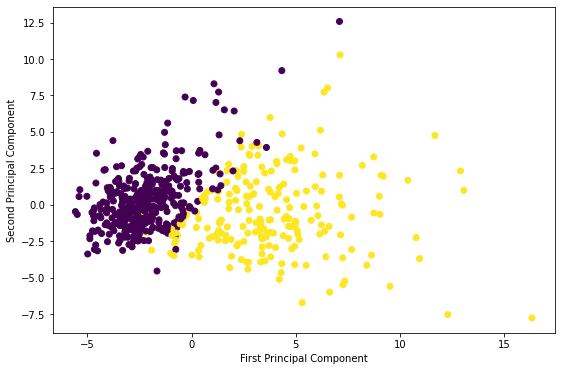

In [23]:
# Plot scatter after the PCA transform
# color code each point (sample) using the corresponding class of target_data

plt.figure(figsize=(9,6))
plt.scatter(x_pca[:,0],x_pca[:,1],c=target_data,cmap='viridis')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')

### Interpreting the components 

The components correspond to combinations of the original features. The components themselves are stored as an attribute of the fitted PCA object:

In [24]:
pca.components_

array([[ 0.21890244,  0.10372458,  0.22753729,  0.22099499,  0.14258969,
         0.23928535,  0.25840048,  0.26085376,  0.13816696,  0.06436335,
         0.20597878,  0.01742803,  0.21132592,  0.20286964,  0.01453145,
         0.17039345,  0.15358979,  0.1834174 ,  0.04249842,  0.10256832,
         0.22799663,  0.10446933,  0.23663968,  0.22487053,  0.12795256,
         0.21009588,  0.22876753,  0.25088597,  0.12290456,  0.13178394],
       [-0.23385713, -0.05970609, -0.21518136, -0.23107671,  0.18611302,
         0.15189161,  0.06016536, -0.0347675 ,  0.19034877,  0.36657547,
        -0.10555215,  0.08997968, -0.08945723, -0.15229263,  0.20443045,
         0.2327159 ,  0.19720728,  0.13032156,  0.183848  ,  0.28009203,
        -0.21986638, -0.0454673 , -0.19987843, -0.21935186,  0.17230435,
         0.14359317,  0.09796411, -0.00825724,  0.14188335,  0.27533947]])

In [41]:
df1 = df.T

In [40]:
pca_comp = pd.DataFrame(pca.components_).T
pca_comp.index = df1.index
pca_comp

,0,1
radius_mean,0.218902,-0.233857
texture_mean,0.103725,-0.059706
perimeter_mean,0.227537,-0.215181
area_mean,0.220995,-0.231077
smoothness_mean,0.142590,0.186113
compactness_mean,0.239285,0.151892
concavity_mean,0.258400,0.060165
concave points_mean,0.260854,-0.034768
symmetry_mean,0.138167,0.190349
fractal_dimension_mean,0.064363,0.366575


The first principal component (0) is strongly correlated with 13 of the original variables, which are concave points_mean, concave points_worst, concave points_mean, concavity_mean, radius_mean, perimeter_mean, area_mean, radius_se, perimeter_se, area_se, radius_worst, perimeter_worst, area_worst. This suggests that these variables vary together. If one increases, then the remaining ones tends to increase as well. This component can be viewed as a measure of the concavity, concave point, radius, perimeter, and area.

While the second principal component (1) is strongly positive-correlated with 5 of the original variables, which are fractal_dimension_mean, fractal_dimension_se, fractal_dimension_worst, symmetry_se, and smoothness_se. This suggests that these variables vary together. If one increases, then the remaining ones tends to increase as well. This component can be viewed as a measure of the fractal dimension, symmetry, and smoothness.

In [59]:
df.columns

Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [60]:
# number of components
n_pcs= pca.components_.shape[0]

# get the index of the most important feature on each component
most_important = [np.abs(pca.components_[i]).argmax() for i in range(n_pcs)]

initial_feature_names = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst']
# get the names
most_important_names = [initial_feature_names[most_important[i]] for i in range(n_pcs)]

# list
dic = {'PC{}'.format(i): most_important_names[i] for i in range(n_pcs)}

# build the dataframe
im = pd.DataFrame(dic.items())

In [61]:
# the most important feature on each PC
im

,0,1
0,PC0,concave points_mean
1,PC1,fractal_dimension_mean


on the PC0 the concave points_mean feature is the most important and on PC1 the fractal_dimension_mean feature is the most important.

### Explained Variance
The explained variance tells how much information (variance) can be attributed to each of the principal components. This is important as we can convert n dimensional space to 2 dimensional space, we lose some of the variance (information).

In [26]:
pca.explained_variance_ratio_

array([0.44272026, 0.18971182])

The variance attributed by 1st and 2nd Components: PC1 explains 44.3% of the variance and PC2 explains 19% of the variance. Together, they explain 63.3%. Ideally, the sum above should be 100%. The remaining variance (36.7%) lost in PCA process.

### 2. With 3 Principal Components

In [42]:
pca_3 = PCA(n_components=3)
pca_3.fit(scaled_data)
x_pca_3 = pca_3.transform(scaled_data)

In this numpy matrix array, each row represents a principal component, and each column relates back to the original features.

In [62]:
print('Original shape', scaled_data.shape)
print('\nTransformed shape', x_pca_3.shape)

Original shape (569, 30)

Transformed shape (569, 3)


In [53]:
pca_3.components_

array([[ 0.21890244,  0.10372458,  0.22753729,  0.22099499,  0.14258969,
         0.23928535,  0.25840048,  0.26085376,  0.13816696,  0.06436335,
         0.20597878,  0.01742803,  0.21132592,  0.20286964,  0.01453145,
         0.17039345,  0.15358979,  0.1834174 ,  0.04249842,  0.10256832,
         0.22799663,  0.10446933,  0.23663968,  0.22487053,  0.12795256,
         0.21009588,  0.22876753,  0.25088597,  0.12290456,  0.13178394],
       [-0.23385713, -0.05970609, -0.21518136, -0.23107671,  0.18611303,
         0.15189162,  0.06016536, -0.0347675 ,  0.19034878,  0.36657546,
        -0.10555215,  0.08997968, -0.08945723, -0.15229262,  0.20443046,
         0.23271591,  0.19720728,  0.13032155,  0.183848  ,  0.28009202,
        -0.21986638, -0.0454673 , -0.19987843, -0.21935186,  0.17230435,
         0.14359318,  0.09796412, -0.00825724,  0.14188334,  0.27533946],
       [-0.00853124,  0.06454991, -0.00931423,  0.02869953, -0.104292  ,
        -0.07409169,  0.0027338 , -0.02556349, -0

In [54]:
pca_comp_3 = pd.DataFrame(pca_3.components_).T
pca_comp_3.index = df1.index
pca_comp_3

,0,1,2
radius_mean,0.218902,-0.233857,-0.008531
texture_mean,0.103725,-0.059706,0.064550
perimeter_mean,0.227537,-0.215181,-0.009314
area_mean,0.220995,-0.231077,0.028700
smoothness_mean,0.142590,0.186113,-0.104292
compactness_mean,0.239285,0.151892,-0.074092
concavity_mean,0.258400,0.060165,0.002734
concave points_mean,0.260854,-0.034768,-0.025563
symmetry_mean,0.138167,0.190349,-0.040240
fractal_dimension_mean,0.064363,0.366575,-0.022574


In [44]:
pca_3.explained_variance_ratio_

array([0.44272026, 0.18971182, 0.09393163])

The total variance attributed by three Components is 72.6%

### Check the accuracy for  2 vs. 3 components in Prediction

#### 2 Components Prediction Accuracy

In [45]:
from sklearn.model_selection import train_test_split

In [46]:
train_data, test_data, train_output, test_output = train_test_split( df, target_data, test_size=0.3, random_state=101)

In [47]:
train_data = scaler.transform(train_data)
test_data = scaler.transform(test_data)

In [48]:
train_data = pca.transform(train_data)
test_data = pca.transform(test_data)

In [49]:
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression(solver = 'lbfgs')
logisticRegr.fit(train_data, train_output)


LogisticRegression()

In [50]:
logisticRegr.score(test_data, test_output)

0.9532163742690059

#### 3 Components Prediction Accuracy

In [52]:
train_data, test_data, train_output, test_output = train_test_split( df, target_data, test_size=0.3, random_state=101)
train_data = scaler.transform(train_data)
test_data = scaler.transform(test_data)

train_data = pca_3.transform(train_data)
test_data = pca_3.transform(test_data)
logisticRegr = LogisticRegression(solver = 'lbfgs')

logisticRegr.fit(train_data, train_output)
logisticRegr.score(test_data, test_output)

0.9415204678362573